## Preparing

### Importing packages

In [8]:
import sys
sys.path.append("..")

# python framework for working with images
import cv2

# some utility functions for plotting images
#from utils.imutils import jimshow

from zipfile import ZipFile
import os
import matplotlib.pyplot as plt
import pandas as pd

### Opening the zip file

In [7]:
file_name = "data/flowers.zip"

with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
flowers/                                       2022-03-02 12:01:08            0
__MACOSX/._flowers                             2022-03-02 12:01:08          213
flowers/image_1264.jpg                         2006-05-05 01:10:20        54622
__MACOSX/flowers/._image_1264.jpg              2006-05-05 01:10:20          213
flowers/image_1270.jpg                         2006-05-05 01:10:22        20452
__MACOSX/flowers/._image_1270.jpg              2006-05-05 01:10:22          213
flowers/image_0608.jpg                         2006-05-05 01:06:12        37937
__MACOSX/flowers/._image_0608.jpg              2006-05-05 01:06:12          213
flowers/image_0620.jpg                         2006-05-05 01:06:18        43113
__MACOSX/flowers/._image_0620.jpg              2006-05-05 01:06:18          213
flowers/image_1258.jpg                         2006-05-05 01:10:18        37773
__MACOSX/flowers/._image_1258.jpg       

## Defining image

In [2]:
path_to_image = os.path.join("flowers", "image_0013.jpg")
image = cv2.imread(path_to_image)
#jimshow(image, "Image")

### Extracting colour histogram for that image

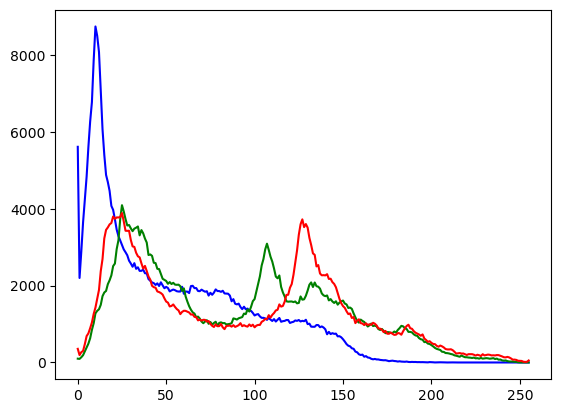

In [5]:
# blue
hist = cv2.calcHist([image], [0], None, [256], [0,256])
plt.plot(hist, color="Blue")

# green
hist = cv2.calcHist([image], [1], None, [256], [0,256])
plt.plot(hist, color="Green")

# red
hist = cv2.calcHist([image], [2], None, [256], [0,256])
plt.plot(hist, color="Red")

hist_mainpic = cv2.calcHist([image], [0,1,2], None, [256,256,256], [0,256, 0,256, 0,256])
hist_mainpic = cv2.normalize(hist_mainpic, hist_mainpic, 0, 1.0, cv2.NORM_MINMAX)

## Extracting colour histogram for all images

In [ ]:
# hiding the plots so it wont be too long
matplotlib.use('Agg')

def plot_histogram(filename):
    # set data path
    input_path = os.path.join("flowers", filename)
    #load image
    image = cv2.imread(input_path)
    #split channels
    channels = cv2.split(image)
    # names of colours
    colors = ("b", "g", "r")
    # create plot
    plt.figure()
    # add title
    plt.title("Histogram")
    # Add xlabel
    plt.xlabel("Bins")
    # Add ylabel
    plt.ylabel("# of Pixels")

    # for every tuple of channel, colour
    for (channel, color) in zip(channels, colors):
        # Create a histogram
        hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
        # Plot histogram
        plt.plot(hist, color=color)
        # Set limits of x-axis
        plt.xlim([0, 256])
    
    #save the plot 
    output_path = os.path.join("out",filename)
    plt.savefig(output_path)
    # Show plot
    plt.show()

directory = "flowers"

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        plot_histogram(filename)

## Compare histograms

In [ ]:
# create an empty df
hist_all = pd.DataFrame(columns = ['Filename', 'Histogram_diff'])

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        other_image = cv2.imread(f)
        plot_histogram(filename)
        hist_otherpic = cv2.calcHist([other_image], [0,1,2], None, [256,256,256], [0,256, 0,256, 0,256])
        hist_otherpic = cv2.normalize(hist_otherpic, hist_otherpic, 0, 1.0, cv2.NORM_MINMAX)
        diff = round(cv2.compareHist(hist_mainpic, hist_otherpic, cv2.HISTCMP_CHISQR), 2)
        hist_all = hist_all.append({'Filename' : filename, 'Histogram_diff' : diff},
        ignore_index = True)

## Finding the five images

In [16]:
top_five = hist_all.nlargest(5, 'Histogram_diff')

# create an empty df
df_top_five = pd.DataFrame(columns = ['Filename', 'Distance'])
df_top_five['Filename'] = top_five['Filename']
df_top_five['Distance'] = top_five['Histogram_diff']

### Saving the CVS file

In [20]:
df_top_five.to_csv('out/top_five.csv')